In [5]:
import os
os.chdir( "/home/lucasfuzato/CODING/WINE" )

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from src.aux_fun import *

X , norm_X , X_2d , attr = cluster_get_data()

/home/lucasfuzato/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


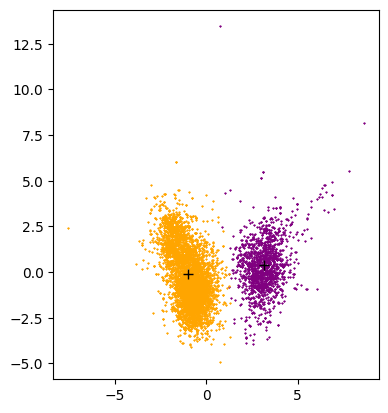

In [7]:
Num_cluster = 2
KM = KMeans( n_clusters = Num_cluster )
KM.fit( norm_X )

labels = KM.predict( norm_X )
colors = [ "purple" , "orange" , "green"]
for i in range( Num_cluster ):

    where = ( labels == i )

    xs = X_2d[ 0 , where ]
    ys = X_2d[ 1 , where ]

    plt.plot( xs , ys , color = colors[ i ] , markersize = 1 , ls = "", marker = "*")

    #--------------------------------------------------
    # printing centroids
    cx , cy  = X_2d.T[ where ].mean( axis = 0 )
    plt.plot( cx , cy , "+k" , markersize = 7 )

# plt.gca().set_aspect('equal')
plt.show()

In [ ]:
# stats for every cluster

df_lst = []
prob_lst = []
for i in range( Num_cluster ):
    where = ( labels == i )
    df , probs = cluster_stats( X[ where ] , attr )
    df_lst.append( df )
    prob_lst.append( probs )

big_df = pd.concat(
    { f"cluster_{i+1}" : df for i , df in enumerate( df_lst ) },
    axis = 1
)

print( big_df )

                     cluster_1         cluster_2        
                          mean     std      mean     std
fixed acidity           8.3287   1.736    6.8524   0.842
volatile acidity       0.53124   0.179   0.27723   0.098
citric acid            0.27022   0.195   0.33441   0.121
residual sugar          2.5712   2.096    6.3793   5.001
chlorides             0.088168   0.048  0.045561   0.021
free sulfur dioxide     15.732  10.237    35.347  16.998
total sulfur dioxide    46.349  32.526    138.36  42.537
density                 0.9968   0.002   0.99401   0.003
pH                      3.3109   0.154    3.1884   0.151
sulphates              0.65957   0.169   0.48945   0.114
alcohol                 10.413   1.064    10.517   1.231


In [ ]:
# silloute = mean_si_coef( X_2d , labels )

# meta information of the clusters
meta_df = pd.DataFrame( index = [ "red_prob" , "num_entries" , "score" ]  )
for i in range( Num_cluster ):

    red_prob = prob_lst[ i ]

    where = ( labels == i )
    num_entries = int( sum( map( int , where ) ) )

    X_where = norm_X[ where ]
    score = cluster_score( X_where )

    cls_name = f"cluster_{ i + 1 }"
    meta_df[ cls_name ] = pd.Series(
        [ red_prob , num_entries , score ],  
        index = [ "red_prob" , "num_entries" , "score" ] 
    )

print( meta_df )

               cluster_1    cluster_2
red_prob        0.992486     0.002857
num_entries  1597.000000  4900.000000
score           2.973244     2.677585
